## Setup

In [2]:
from scipy.stats import hypergeom
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
# Run if jupyterthemes installed
from jupyterthemes import jtplot
jtplot.style(theme='gruvboxd')

In [4]:
import itertools

p_vals_m3 = pd.read_csv('../output/p_vals_m3.csv')
significant = set(p_vals_m3.iloc[:, 0])
for i, val in enumerate(itertools.islice(significant, 10)):
    print(val)
print(len(significant))

vanillate
N-acetyl-beta-glucosaminylamine
glycocholate sulfate
S-(3-hydroxypropyl)mercapturic acid (HPMA)
kynurenate
N-carbamoylaspartate
1-carboxyethylleucine
diethanolamine
2'-deoxycytidine
diaminopimelate
118


In [5]:
subpathways = pd.read_csv('../data/subpathways.csv')
subpathways

,Subpathway,Biochemical
0,"Fatty Acid, Branched",(12 or 13)-methylmyristate (a15:0 or i15:0)
1,"Fatty Acid, Branched",(14 or 15)-methylpalmitate (a17:0 or i17:0)
2,"Fatty Acid, Branched",(16 or 17)-methylstearate (a19:0 or i19:0)
3,Dinucleotide,(3'-5')-adenylyladenosine*
4,Dinucleotide,(3'-5')-adenylylcytidine
...,...,...
818,Food Component/Plant,vanillate
819,"Purine Metabolism, (Hypo)Xanthine/Inosine cont...",xanthine
820,"Purine Metabolism, (Hypo)Xanthine/Inosine cont...",xanthosine
821,Tryptophan Metabolism,xanthurenate


## Hypergeometric Test

#### Let M = set of all metabolites
#### Let S = set of significant metabolites
####  Let N = $|M|$ = 823
####  Let n = $|S|$ = 118
<br/>

#### for subpathway in subpathways:
#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Let A = set of metabolites in subpathway 
#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Let k = $|A|$
#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Let r = $|A \cap S|$
### &nbsp;&nbsp;&nbsp;&nbsp; $h(x; N, n, k) = \frac{\binom{k}{x} \binom {N - k}{n - x}}{\binom{N}{n}}$
### &nbsp;&nbsp;&nbsp;&nbsp; $p = \sum_{x = r}^{n}{h(x; N, n, k)}$

### Setup functions

In [6]:
def get_metabolites(subpathway, subpathways):
    """
    subpathway is a string that has the name of a subpathway of interest.
    subpathways is a dataframe containing subpathway names and their corresonding biochemicals
    returns the set of all metabolites in subpathway
    """
    return set(subpathways[subpathways['Subpathway'] == subpathway].iloc[:, 1])
    
get_metabolites('Fatty Acid, Branched', subpathways)

{'(12 or 13)-methylmyristate (a15:0 or i15:0)',
 '(14 or 15)-methylpalmitate (a17:0 or i17:0)',
 '(16 or 17)-methylstearate (a19:0 or i19:0)',
 '18-methylnonadecanoate (i20:0)'}

In [68]:
def debug_hypergeometric(rv, A, sub_and_sig, subpathway):
        """
        Display and print info about hypergeometric distribution
        """
        print(len(A), "metabolites in", subpathway, ":", A)
        print()
        print(len(sub_and_sig), "signficant Metabolites in", subpathway, ": ", sub_and_sig)
        x = np.arange(0, n+1)
        pmf_metab = rv.pmf(x)
        fig = plt.figure(figsize=(16, 16), dpi=80)
        ax = fig.add_subplot(111)
        ax.plot(x, pmf_metab, 'o', color = 'cyan')
        ax.vlines(x, 0, pmf_metab, lw=1, color='cyan')
        ax.set_xlabel('# of metabolites belonging to subpathway',fontsize=20)
        ax.set_ylabel('hypergeom PMF', fontsize=20)
        plt.figtext(.5, 0.9, 'Subpathway: ' + subpathway,fontsize=40,ha='center')
        plt.savefig('../output/hypergeom.png')
        plt.show()

68 metabolites in Food Component/Plant : {'vanillate', 'dihydrocaffeate sulfate (2)', '2,8-quinolinediol', 'glycitein', 'pheophorbide A', 'feruloylputrescine', '1-methyl-beta-carboline-3-carboxylic acid', 'daidzein', 'sinapate', 'ferulate', 'apigenin', 'dihydroferulic acid sulfate', 'gluconate', 'equol', 'pyrraline', 'N-glycolylneuraminate', '4-acetylcatechol sulfate (1)', 'soyasaponin III', 'daidzein sulfate (1)', 'dihydroferulate', '1,2-dilinolenoyl-digalactosylglycerol (18:3/18:3)', 'quinate', 'diaminopimelate', 'genistein sulfate*', 'syringic acid', 'ferulylglycine (1)', 'genistein', 'soyasaponin I', 'equol sulfate', '2-isopropylmalate', 'erythritol', '3-dehydroshikimate', '2,3-dihydroxyisovalerate', 'enterolactone', 'naringenin', '2-hydroxyquinoline', '3-formylindole', 'deoxymugineic acid', 'erythrose', 'tartronate (hydroxymalonate)', '2-keto-3-deoxy-gluconate', 'soyasaponin II', 'indolin-2-one', 'N-acetylpyrraline', 'pinosylvin', 'ergothioneine', 'homostachydrine*', 'pheophytin A

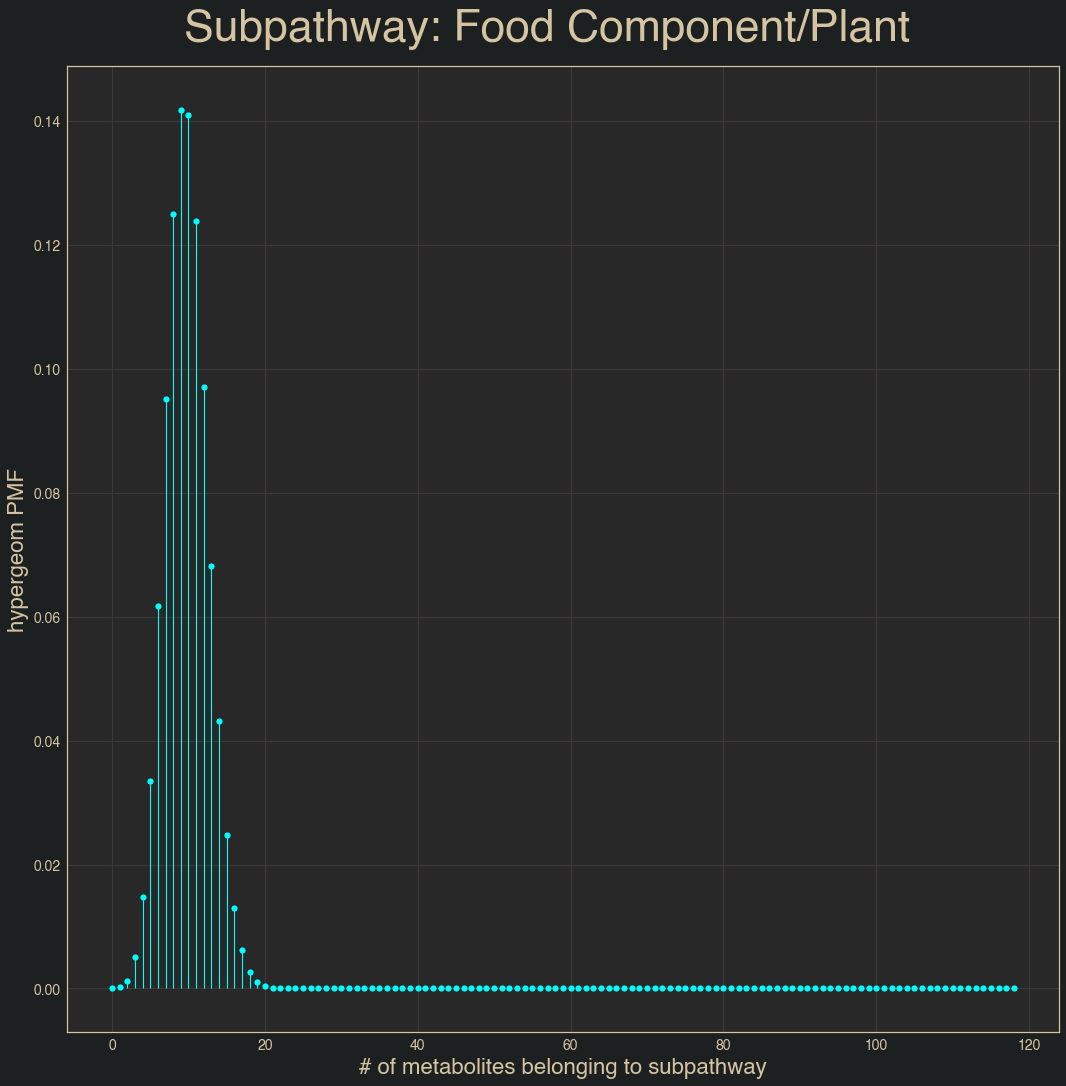

(0.04831133260798792, 68, 15)

In [69]:
from scipy.stats import hypergeom
import matplotlib.pyplot as plt

N = 823
n = 118

def hypergeometric_test(subpathway, significant, subpathways, verbose=False):
    """
    subpathway is a string that has the name of a subpathway of interest.
    significant is a set of all significant metabolites
    subpathways is a dataframe containing subpathway names and their corresonding biochemicals
    p is calculated using hypergeometric distribution and formula above.
    Returns (p, k, r)
    """
    A = get_metabolites(subpathway, subpathways) # all metabolites in subpathway
    k = len(A)
    sub_and_sig = A & significant
    r = len(sub_and_sig)
    
    rv = hypergeom(N, n, k)
    p = 1 - rv.cdf(r - 1)
    
    if verbose:
        debug_hypergeometric(rv, A, sub_and_sig, subpathway)
        
    return p, k, r
hypergeometric_test('Food Component/Plant', significant, subpathways, verbose=True)

## Do Hypergeometric Test on all Subpathways

In [43]:
subpathways_list = subpathways['Subpathway'].unique()
subpathways_list[:10], len(subpathways_list)

(array(['Fatty Acid, Branched', 'Dinucleotide', 'Polyamine Metabolism',
        'Lysoplasmalogen', 'Plasmalogen', 'Chemical',
        'Food Component/Plant', 'Glycolipid Metabolism',
        'Phosphatidylcholine (PC)', 'Phosphatidylethanolamine (PE)'],
       dtype=object),
 94)

In [44]:
output_df = pd.DataFrame.from_dict({'Subpathway': subpathways_list, 'p-value' : -1, 
                         '# of metabolites': -1, '# of significant metabolites': -1})
output_df

,Subpathway,p-value,# of metabolites,# of significant metabolites
0,"Fatty Acid, Branched",-1,-1,-1
1,Dinucleotide,-1,-1,-1
2,Polyamine Metabolism,-1,-1,-1
3,Lysoplasmalogen,-1,-1,-1
4,Plasmalogen,-1,-1,-1
...,...,...,...,...
89,Oxidative Phosphorylation,-1,-1,-1
90,Pterin Metabolism,-1,-1,-1
91,Vitamin B6 Metabolism,-1,-1,-1
92,Drug - Topical Agents,-1,-1,-1


In [47]:
sumK = 0
sumR = 0
for i in range(len(subpathways_list)):
    (p, k, r) = hypergeometric_test(subpathways_list[i], significant, subpathways, verbose=False)
    output_df.iloc[i, 1:] = (p, k, r)
    sumK += k
    sumR += r
    
# make sure that the sum of metabolites = N and the sum of all significant metabolies = n
assert(sumK == N and sumR == n)

output_df_sorted = output_df.sort_values('p-value')
output_df_sorted.head(15)

,Subpathway,p-value,# of metabolites,# of significant metabolites
55,Endocannabinoid,0.003406,12,6
52,Primary Bile Acid Metabolism,0.004358,9,5
35,TCA Cycle,0.007724,10,5
41,Tryptophan Metabolism,0.042433,19,6
6,Food Component/Plant,0.048311,68,15
38,Secondary Bile Acid Metabolism,0.050637,15,5
15,"Leucine, Isoleucine and Valine Metabolism",0.077965,27,7
91,Vitamin B6 Metabolism,0.100592,4,2
93,Short Chain Fatty Acid,0.143378,1,1
80,Lactosylceramides (LCER),0.143378,1,1


In [107]:
output_df_sorted.to_csv('../output/subpathways_hypergeometric.csv', index=False)

In [111]:
from statsmodels.stats.multitest import multipletests

output_df_sorted_adjusted = output_df_sorted.copy()
output_df_sorted_adjusted.iloc[:, 1] = multipletests(
    output_df_sorted_adjusted.iloc[:, 1], method='fdr_bh')[1]
output_df_sorted_adjusted.head(10)

,Subpathway,p-value,# of metabolites,# of significant metabolites
55,Endocannabinoid,0.204816,12,6
52,Primary Bile Acid Metabolism,0.204816,9,5
35,TCA Cycle,0.242011,10,5
41,Tryptophan Metabolism,0.793307,19,6
6,Food Component/Plant,0.793307,68,15
38,Secondary Bile Acid Metabolism,0.793307,15,5
15,"Leucine, Isoleucine and Valine Metabolism",1.000000,27,7
91,Vitamin B6 Metabolism,1.000000,4,2
93,Short Chain Fatty Acid,1.000000,1,1
80,Lactosylceramides (LCER),1.000000,1,1


In [112]:
output_df_sorted_adjusted.to_csv('../output/subpathways_hypergeometric_adjusted.csv', index=False)